# Laboratorium 5

Transformata falkowa

Martyna Toborek 311843

In [136]:
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt
from scipy.io import wavfile
import pywt

W tym sprawozdaniu należy przeanalizować sygnały przy użyciu transformaty falkowej - wykorzystam biblioteki PyWavalets. 

Do analizy wykorzystam falkę Coifflet, która przedstawiona jest na poniższym wyresie.

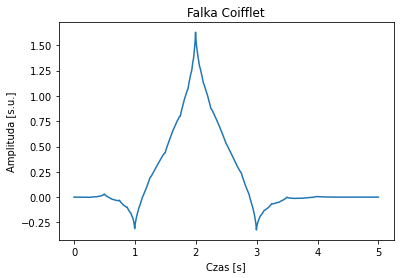

In [137]:
wavelet = pywt.Wavelet('coif1')
axes = wavelet.wavefun()
plt.plot(axes[-1],axes[0])
plt.xlabel("Czas [s]")
plt.ylabel("Amplituda [s.u.]")
plt.title("Falka Coifflet")
plt.show()

# Zad1

W pierwszym zadaniu należy przeanalizować sygnał harmoniczny sinusoidalny. 

W poniższej komórce jest zdefiniowany sygnał. 

In [138]:
N=1000
A = 2
f=5
fs=1000
dt=1/fs
t=dt*np.arange(N)
sin = A * np.sin(2 * np.pi * f * t)

W poniższej komórce wyznaczam liczbę poziomów do dekompozycji (level_sin) oraz współczynniki rozwinięcia w bazie falek dla wyznaczonej liczby poziomów wykorzystując funkcję wavedec() z biblioteki PyWavelets.
Następnie wyznaczam za pomocą funkcji central_frequency() częstotliwość środkową dla początkowej falki.

In [139]:
level_sin = int(np.round(np.log2(len(sin))))
coeff_sin = pywt.wavedec(sin, "coif1", level=level_sin)
f_c_sin = pywt.central_frequency("coif1") * fs

c:\Users\tynka\AppData\Local\Programs\Python\Python310\lib\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 10 is too high: all coefficients will experience boundary effects.
  warnings.warn(


W poniższej komórce przedstawiamy sygnał oryginalny oraz skaloogram przedstawiający dystretną transformatę falkową. 

Aby było to możliwe należało wyznaczyć wartości: ilości współczynników dekompozycji (l_sin), szereg czasowy (t_sin), połowa szerokości pasma częstotliwości (psp_sin). 

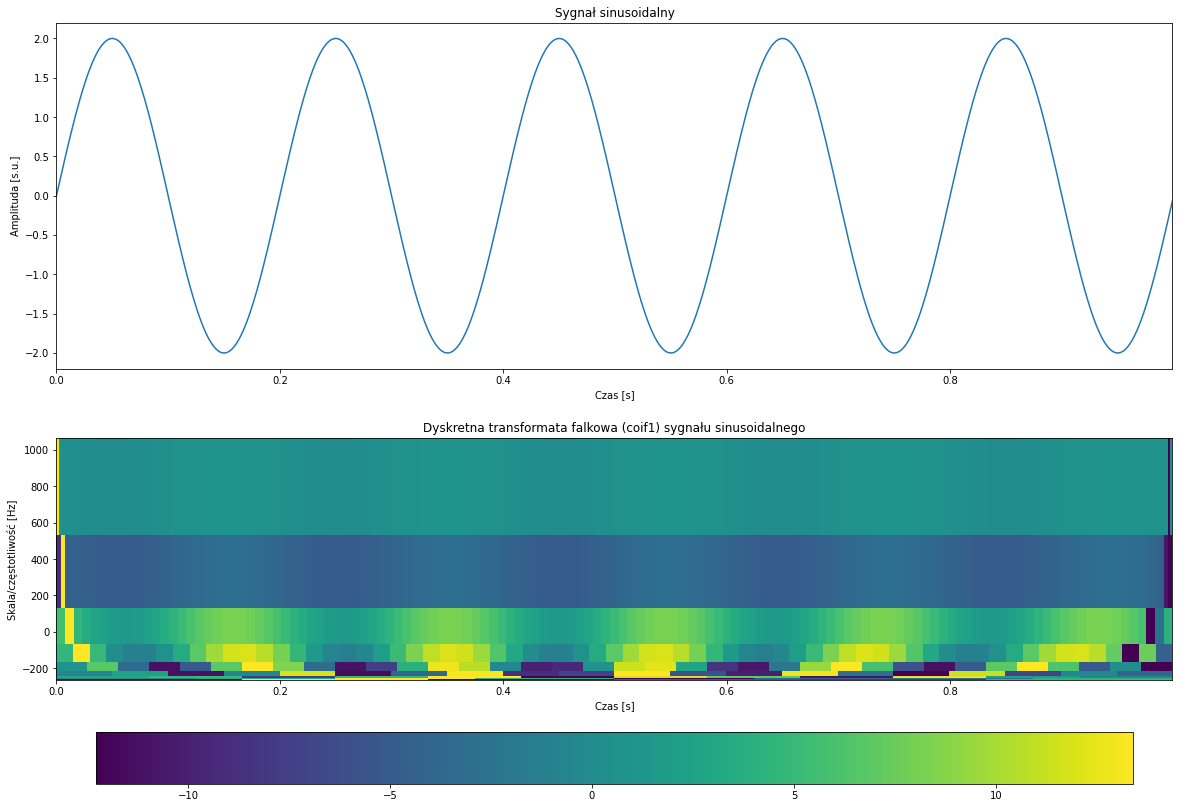

In [155]:
fig, (ax1, ax2) = plt.subplots(ncols=1,nrows=2)
ax1.plot(t, sin)
ax1.set_xlabel("Czas [s]")
ax1.set_ylabel("Amplituda [s.u.]")
ax1.set_title("Sygnał sinusoidalny")
ax1.set_xlim(left=0,right=t[-1])

for i in range(1,len(coeff_sin)):
        l_sin = len(coeff_sin[i]) 
        t_sin = np.linspace(0,t[-1],l_sin+1) 
        
        f_n_1_sin = f_c_sin/(2**(level_sin + 1 - i)) 
        f_n_sin = f_c_sin/(2**(level_sin - i)) 
        psp_sin = 2 * (f_n_sin - f_n_1_sin) / 3 
        s_sin = np.array([f_n_sin - h_b_w_sin , f_n_sin + h_b_w_sin])
         
        ax2.pcolormesh(t_sin,s_sin,np.array([coeff_sin[i]])) 
        

ax2.set_xlabel("Czas [s]")
ax2.set_ylabel("Skala/częstotliwość [Hz]")
ax2.set_title("Dyskretna transformata falkowa (coif1) sygnału sinusoidalnego")
#ax2.set_ylim(-250, 650)

PCM = ax2.get_children()[2]
plt.colorbar(PCM,ax=ax2,location='bottom')
fig.set_figheight(14)
fig.set_figwidth(20)

plt.show()

Współczynniki rozwicięcia sygnału znajdują się w przedziale od ok. -12 do 12.Jesteśmy w stanie zauważyć, że im wyższe częstotliwości tym mniejsza amplituda współczynników (kolor jest bardziej jednolity).

# Zad2

W poniższym zadaniu należy przeanalizować świergot. 

Poniższa analiza jest przeprawadzona w sposób analogiczny do tego w poprzednim zadaniu.


In [ ]:
N = 1000
f1 = 10
f2 = 100
fs = 500
t = np.arange(N) / fs
signal = sig.chirp(t, f1, t[-1], f2, 'linear')

In [ ]:
level_sig = int(np.round(np.log2(len(signal))))
coeff_sig = pywt.wavedec(signal, "coif1", level=level_sig)
f_c_sig = pywt.central_frequency("coif1")* fs

c:\Users\tynka\AppData\Local\Programs\Python\Python310\lib\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 10 is too high: all coefficients will experience boundary effects.
  warnings.warn(


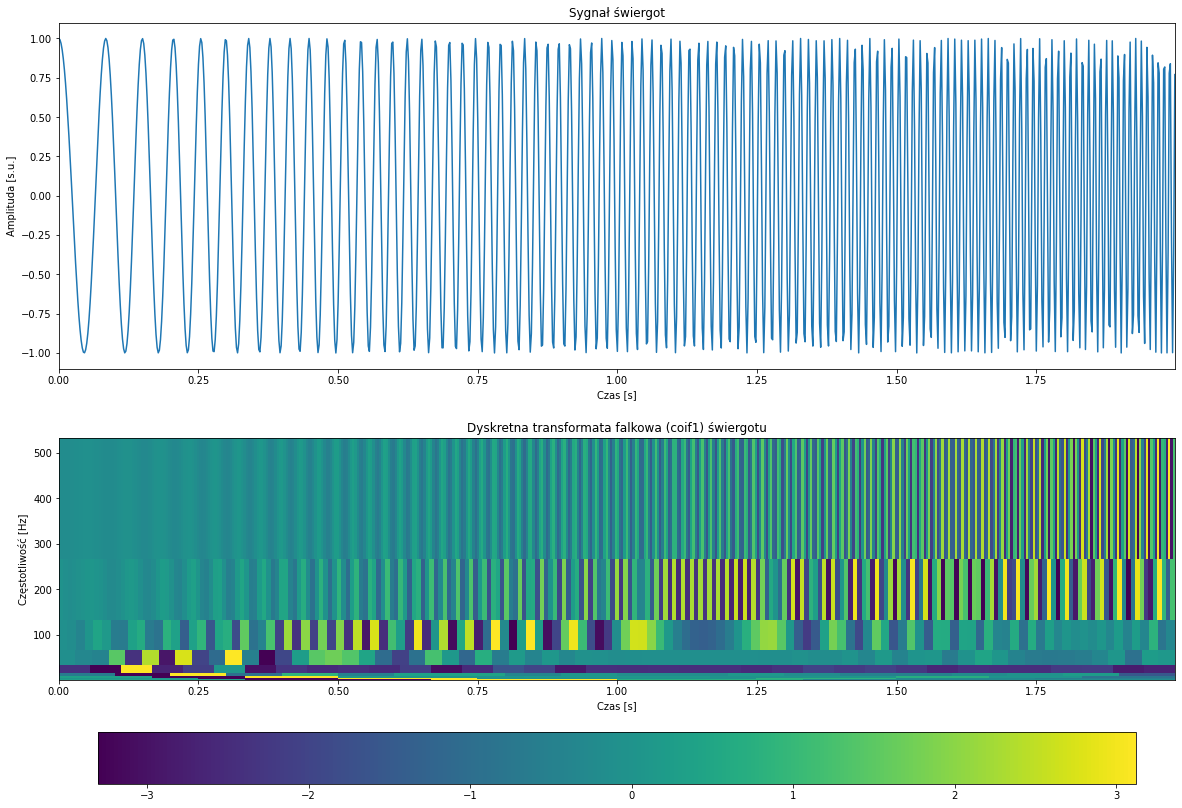

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=1,nrows=2)
ax1.plot(t, signal)
ax1.set_xlabel("Czas [s]")
ax1.set_ylabel("Amplituda [s.u.]")
ax1.set_title("Sygnał świergot")
ax1.set_xlim(left=0,right=t[-1])

for i in range(1,len(coeff_sig)):
        l_sig = len(coeff_sig[i]) 
        t_sig = np.linspace(0,t[-1],l_sig+1)
        
        f_n_1_sig = f_c_sig/(2**(level_sig + 1 - i))
        f_n_sig = f_c_sig/(2**(level_sig - i))
        psp_sig = 2 * (f_n_sig - f_n_1_sig) / 3 
        s_sig = np.array([f_n_sig - psp_sig,f_n_sig + psp_sig]) 
        ax2.pcolormesh(t_sig,s_sig,np.array([coeff_sig[i]]))

ax2.set_xlabel("Czas [s]")
ax2.set_ylabel("Częstotliwość [Hz]")
ax2.set_title("Dyskretna transformata falkowa (coif1) świergotu")

PCM = ax2.get_children()[2]
plt.colorbar(PCM,ax=ax2,location='bottom')
fig.set_figheight(14)
fig.set_figwidth(20)

plt.show()

Współczynniki rozwicięcia sygnału znajdują się w przedziale od ok. -3,2 do 3. 

Jesteśmy w stanie zauważyć, że wzrost częstotliwości z biegiem czasu, co może być spowodowane faktem, że częstotliwość sygnału początkowego zwiększa się w czasie analogicznie. 

# Zad3

W tym zadaniu należy przeanalizować sygnał prostokątny. 

Poniższa analiza jest przeprawadzona w sposób analogiczny do tego w pierwszym zadaniu.


In [ ]:
N = 1000 
fs = 500
t = np.arange(N) / fs
signal_2 = sig.square(2 * np.pi * 5 * t, 0.25)

In [ ]:
level_sig_2 = int(np.round(np.log2(len(signal_2))))
coeff_sig_2 = pywt.wavedec(signal_2, "coif1", level=level_sig_2) 
f_c_sig_2 = pywt.central_frequency("coif1") * fs

c:\Users\tynka\AppData\Local\Programs\Python\Python310\lib\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 10 is too high: all coefficients will experience boundary effects.
  warnings.warn(


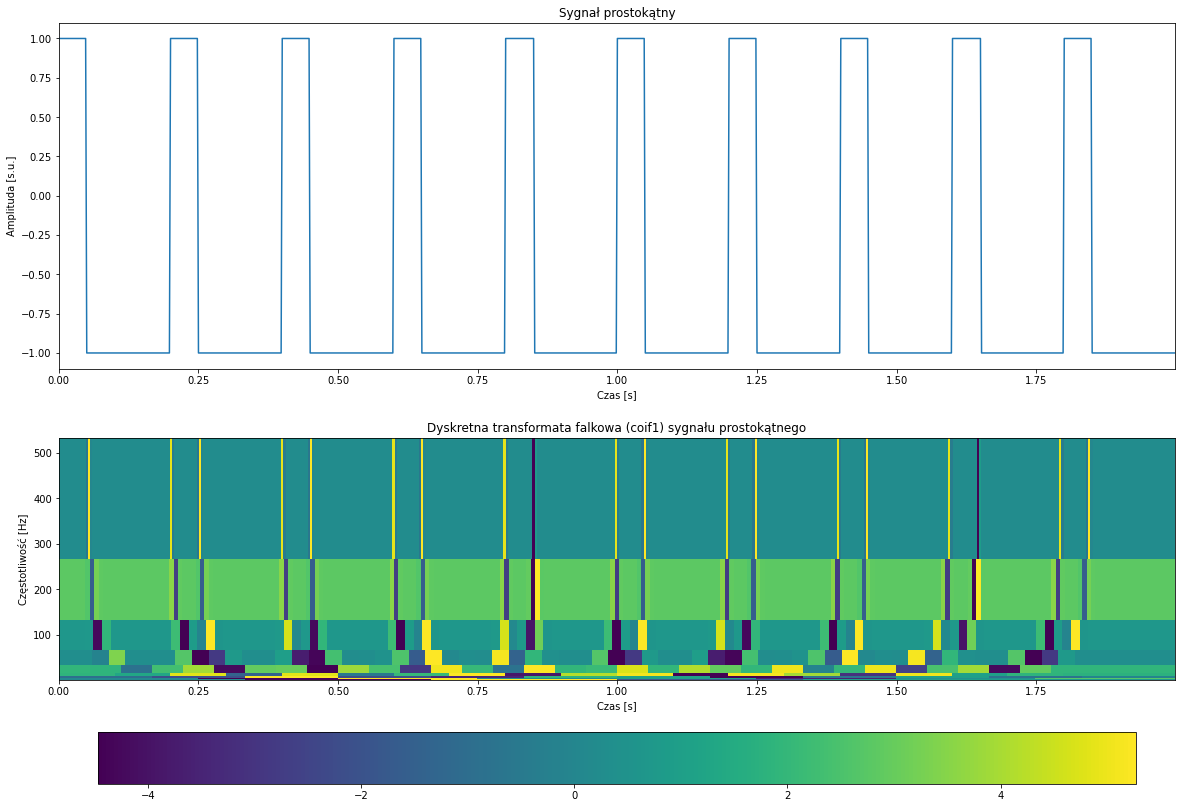

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=1,nrows=2)
ax1.plot(t, signal_2)
ax1.set_xlabel("Czas [s]")
ax1.set_ylabel("Amplituda [s.u.]")
ax1.set_title("Sygnał prostokątny")
ax1.set_xlim(left=0,right=t[-1])

for i in range(1,len(coeff_sig_2)):
        l_sig_2 = len(coeff_sig_2[i])
        t_sig_2 = np.linspace(0,t[-1],l_sig_2+1)
        
        f_n_1_sig_2 = f_c_sig_2/(2**(level_sig_2 + 1 - i)) 
        f_n_sig_2 = f_c_sig_2/(2**(level_sig_2 - i))
        psp_sig_2 = 2 * (f_n_sig_2 - f_n_1_sig_2) / 3 
        s_sig_2 = np.array([f_n_sig_2 - psp_sig_2,f_n_sig_2 + psp_sig_2]) 
        ax2.pcolormesh(t_sig_2,s_sig_2,np.array([coeff_sig_2[i]])) 

ax2.set_xlabel("Czas [s]")
ax2.set_ylabel("Częstotliwość [Hz]")
ax2.set_title("Dyskretna transformata falkowa (coif1) sygnału prostokątnego")

PCM = ax2.get_children()[2]
plt.colorbar(PCM,ax=ax2,location='bottom')
fig.set_figheight(14)
fig.set_figwidth(20)

plt.show()

Współczynniki rozwicięcia sygnału znajdują się w przedziale od ok. -4,2 do 5.

Na skalogramie jesteśmy w stanie zauważyć czułość transformaty na szybkie zmiany sygnału - nagła zmiana wartości sygnału powoduje znaczną zmianę ampliduty na skalogramie.

# Zad4

W tym zadaniu należy przeanalizować sygnał pobrany z pliku rabarbar8k.wav. 

Do pobrania sygnału z pliku wykrzystałam funkcję wavfile.read() z biblioteki scipy.io.

Poniższa analiza jest przeprawadzona w sposób analogiczny do tego w pierwszym zadaniu.


In [156]:
fs, dane = wavfile.read("./rabarbar8k.wav")
data = np.array(dane)
t = np.arange(len(data)) / fs

In [ ]:
level_rab = int(np.round(np.log2(len(data))))
coeff_rab = pywt.wavedec(data, "coif1", level=level_rab)  
f_c_rab = pywt.central_frequency("coif1") * fs

c:\Users\tynka\AppData\Local\Programs\Python\Python310\lib\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 16 is too high: all coefficients will experience boundary effects.
  warnings.warn(


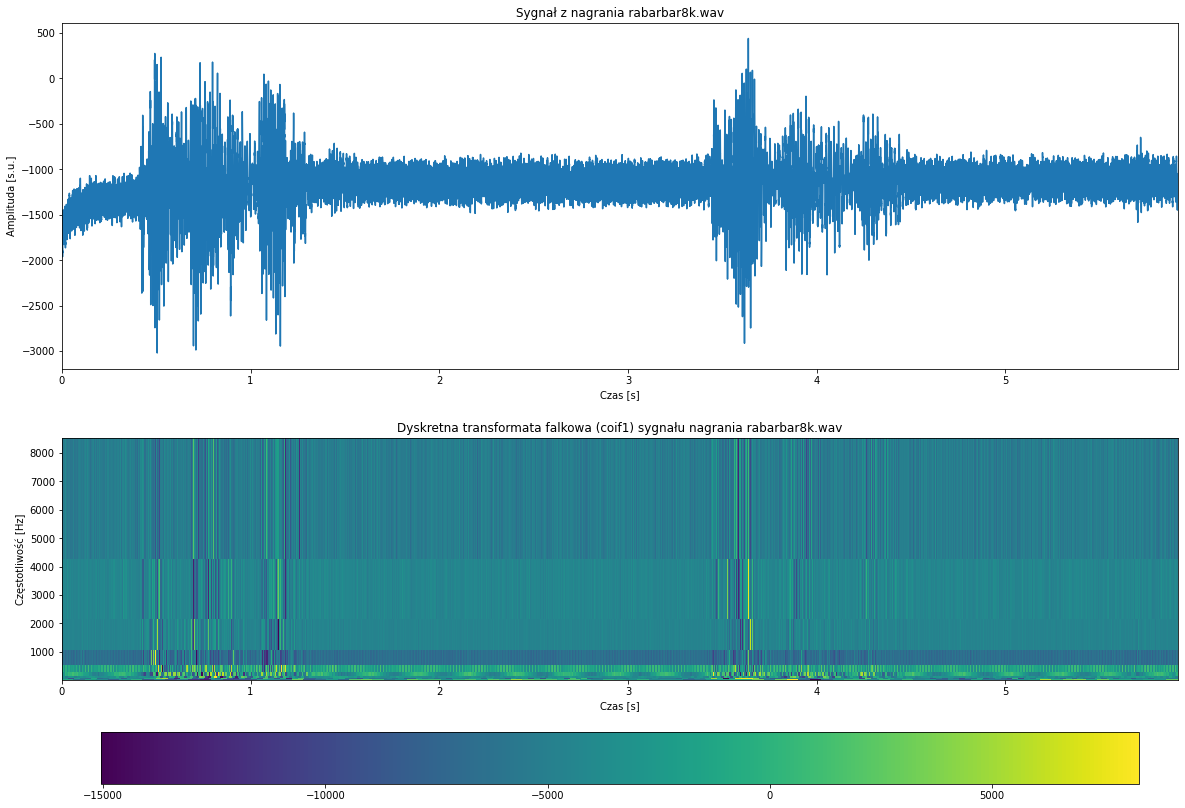

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=1,nrows=2)
ax1.plot(t, data)
ax1.set_xlabel("Czas [s]")
ax1.set_ylabel("Amplituda [s.u.]")
ax1.set_title("Sygnał z nagrania rabarbar8k.wav" )
ax1.set_xlim(left=0,right=t[-1])

for i in range(1,len(coeff_rab)):
        l_rab = len(coeff_rab[i]) 
        t_rab = np.linspace(0,t[-1],l_rab+1) 
        
        f_n_1_rab = f_c_rab/(2**(level_rab + 1 - i)) 
        f_n_rab = f_c_rab/(2**(level_rab - i)) 
        psp_rab = 2 * (f_n_rab - f_n_1_rab) / 3 
        s_rab = np.array([f_n_rab - psp_rab,f_n_rab + psp_rab]) 
        ax2.pcolormesh(t_rab,s_rab,np.array([coeff_rab[i]])) 

ax2.set_xlabel("Czas [s]")
ax2.set_ylabel("Częstotliwość [Hz]")
ax2.set_title("Dyskretna transformata falkowa (coif1) sygnału nagrania rabarbar8k.wav")

PCM = ax2.get_children()[2]
plt.colorbar(PCM,ax=ax2,location='bottom')
fig.set_figheight(14)
fig.set_figwidth(20)

plt.show()

W pliku znajduje się nagranie dwukrotnie wypowiedzianego słowa "rabarbar", co jesteśmy w stanie zobaczyć na sygnale oraz na skalogramie (w momencie wymawiania słów na skalogramie widać, że amplituda zmienia się gwałtownie - kolor jest ciemniejszy lub jaśniejszy). Zauważamy także, że sygnał jest delikatnie zaszumiony. 